# Hypothesis Testing Basics

**What is hypothesis testing?**
- We often want to know whether an observed difference or pattern is "real" or just caused by random chance.
- Hypothesis testing gives a formal way to answer that question using probabilities.

**The language:**
- **H0 (null hypothesis):** the default — "no effect" or "nothing changed" (example: a coin is fair, conversion rates are the same).
- **H1 or Ha (alternative hypothesis):** what you suspect is true (example: the coin is biased toward heads, the new page increases conversions).

**Key ideas (short):**
- Choose a significance level **alpha** (common choice: 0.05). This is the tolerance for making a false alarm (Type I error).
- Compute a **test statistic** from your sample (a number summarizing the evidence).
- Compute the **p-value**: probability (assuming H0 is true) of observing evidence as extreme as what you saw.
- If p ≤ alpha, we say the result is "statistically significant" and **reject H0**; otherwise we do **not reject H0**.

**Why do we need hypothesis testing in ML & business?** Simple reasons:
- **A/B tests:** determine if a new webpage, email, or feature actually improves conversion or if observed uplift is just noise.
- **Model comparison:** decide whether a new model's higher accuracy is likely to reflect a true improvement.
- **Feature validation:** check whether adding a feature changes a metric meaningfully.

**Short note on errors:**
- **Type I error:** falsely reject H0 (false positive). Probability = alpha.
- **Type II error:** fail to reject H0 when H1 is true (false negative). Power = 1 - (Type II error probability).

---

Let's see two tiny, concrete examples next (coin flip and A/B conversion) with very small numbers so the math is clear.

<!-- ==================== GLOBAL LOADER: PYODIDE + CODEMIRROR ==================== -->
<link rel='stylesheet' href='https://cdn.jsdelivr.net/npm/codemirror@5.65.16/lib/codemirror.min.css'>
<link rel='stylesheet' href='https://cdn.jsdelivr.net/npm/codemirror@5.65.16/theme/eclipse.min.css'>
<link rel='stylesheet' href='https://cdn.jsdelivr.net/npm/codemirror@5.65.16/theme/material.min.css'>
<link rel='preconnect' href='https://cdn.jsdelivr.net'>
<link rel='dns-prefetch' href='https://cdn.jsdelivr.net'>
<script src='https://cdn.jsdelivr.net/npm/codemirror@5.65.16/lib/codemirror.min.js'></script>
<script src='https://cdn.jsdelivr.net/npm/codemirror@5.65.16/mode/python/python.min.js'></script>

<style>
.py-cell {border:1px solid var(--pst-color-border,#ccc);border-radius:6px;margin:16px 0;background:var(--pst-color-surface,#fff);box-shadow:0 1px 3px rgba(0,0,0,0.08);overflow:hidden;}
.CodeMirror {border-radius:4px;font-family:monospace;font-size:14px;line-height:1.5;height:auto;background:var(--pst-color-background,#f9f9f9);overflow-y:auto;}
.CodeMirror-scroll {max-height:432px;}
[data-theme='dark'] .CodeMirror,html[data-mode='dark'] .CodeMirror {background:#1e1e1e!important;color:#d4d4d4!important;}
[data-theme='dark'] .CodeMirror-gutters,html[data-mode='dark'] .CodeMirror-gutters {background:#1e1e1e!important;border-right:1px solid #3e3e3e!important;}
[data-theme='dark'] .CodeMirror-linenumber,html[data-mode='dark'] .CodeMirror-linenumber {color:#858585!important;}
.py-run,.py-clear{padding:6px 12px;background:var(--pst-color-surface,#fff);color:var(--pst-color-text,#000);border:1px solid var(--pst-color-border,#ccc);border-radius:4px;cursor:pointer;font-size:13px;margin-right:8px;transition:all .3s;}
.py-run:hover,.py-clear:hover{background:var(--pst-color-primary,#2196f3);color:#fff;border-color:var(--pst-color-primary,#2196f3);}
.py-out{white-space:pre-wrap;word-wrap:break-word;font-family:monospace;font-size:13px;line-height:1.6;overflow-y:auto;padding:8px;background:var(--pst-color-background,#f5f5f5);border-radius:4px;margin:8px 0;color:var(--pst-color-text,#000);}
[data-theme='dark'] .py-out,html[data-mode='dark'] .py-out,[data-theme='dark'] .py-cell .py-out,html[data-mode='dark'] .py-cell .py-out{background:#1e1e1e !important;color:#d4d4d4 !important;}
[data-theme='dark'] .py-cell,html[data-mode='dark'] .py-cell,[data-theme='dark'] .py-cell,html[data-mode='dark'] .py-cell{background:#252525 !important;border-color:#3e3e3e !important;}
[data-theme='dark'] .py-run,html[data-mode='dark'] .py-run,[data-theme='dark'] .py-clear,html[data-mode='dark'] .py-clear,[data-theme='dark'] .py-cell .py-run,html[data-mode='dark'] .py-cell .py-run,[data-theme='dark'] .py-cell .py-clear,html[data-mode='dark'] .py-cell .py-clear{background:#252525 !important;color:#d4d4d4 !important;border-color:#3e3e3e !important;}
.resize-handle{height:14px;background:repeating-linear-gradient(90deg,var(--pst-color-border,#aaa),var(--pst-color-border,#aaa) 2px,transparent 2px,transparent 5px);cursor:ns-resize;border-radius:4px;margin:4px 0;touch-action:none;}
.resize-handle.dragging{background:var(--pst-color-primary,#2196f3);}
</style>

<div style='margin-bottom:10px;padding:10px;background:var(--pst-color-background,#f7f7f7);border-left:3px solid var(--pst-color-primary,#2196f3);border-radius:4px;'>
  <button id='restart-pyodide' style='padding:6px 14px;background:#d32f2f;color:white;border:none;border-radius:3px;cursor:pointer;font-size:13px;'>🔄 Restart Kernel</button>
  <span id='kernel-status' style='margin-left:12px;font-size:13px;'>⏳ Loading Pyodide…</span>
</div>

<script>
(function(){
  if(window.pyodideLoaderInitialized)return;
  window.pyodideLoaderInitialized=true;

  // ---------- Load Pyodide ----------
  window.loadPyodideOnce=async function(){
    if(window.pyodideReadyPromise)return window.pyodideReadyPromise;
    window.pyodideReadyPromise=(async()=>{
      const s=document.createElement('script');
      s.src='https://cdn.jsdelivr.net/pyodide/v0.23.4/full/pyodide.js';
      document.head.appendChild(s);
      await new Promise(r=>s.onload=r);

      const py=await loadPyodide({indexURL:'https://cdn.jsdelivr.net/pyodide/v0.23.4/full/'});

      // -------------------------------------------------
      // Preload scientific Python stack (cached by browser)
      // -------------------------------------------------
      await py.loadPackage([
        'numpy',
        'pandas',
        'matplotlib',
        'scipy',
        'scikit-learn',
        'statsmodels',
        'sympy'
      ]);

      window.pyodide=py;
      const st=document.getElementById('kernel-status');
      if(st){
        st.textContent='✅ Pyodide ready';
        st.style.color='var(--pst-color-primary,#2196f3)';
      }
      return py;
    })();
    return window.pyodideReadyPromise;
  };
  window.loadPyodideOnce();

  // ---------- Restart Kernel ----------
  document.addEventListener('DOMContentLoaded',()=>{
    const b=document.getElementById('restart-pyodide');const s=document.getElementById('kernel-status');
    if(!b||!s)return;
    b.addEventListener('click',async()=>{s.textContent='🔄 Restarting kernel...';s.style.color='orange';b.disabled=true;delete window.pyodide;window.pyodideReadyPromise=null;await window.loadPyodideOnce();s.textContent='✅ Kernel restarted';s.style.color='var(--pst-color-primary,#2196f3)';b.disabled=false;});
  });

  // ---------- Resize Handler ----------
  window.initResizeHandle=function(h,el,minH=80){if(!h||!el)return;let y0,h0;const sd=y=>{y0=y;h0=el.offsetHeight;h.classList.add('dragging');document.body.style.userSelect='none';};const mv=y=>{el.style.height=Math.max(minH,h0+(y-y0))+'px';};const sp=()=>{h.classList.remove('dragging');document.body.style.userSelect='';};h.addEventListener('mousedown',e=>{sd(e.clientY);document.onmousemove=e=>mv(e.clientY);document.onmouseup=()=>{document.onmousemove=null;sp();};});h.addEventListener('touchstart',e=>{const t=e.touches[0];sd(t.clientY);document.ontouchmove=e=>mv(e.touches[0].clientY);document.ontouchend=()=>{document.ontouchmove=null;sp();};});};

  // ---------- Initialize CodeMirror ----------
  const getTheme=()=>{const el=document.documentElement;return (el.getAttribute('data-theme')||el.dataset.mode||'light')==='dark'?'material':'eclipse';};
  window.enableCodeMirrorEditors=function(){
    document.querySelectorAll('.py-cell').forEach(cell=>{
      const t=cell.querySelector('.py-code');
      if(!t||t._cm)return;
      const encodedCode=cell.getAttribute('data-code');
      if(encodedCode){try{const binary=atob(encodedCode);const bytes=Uint8Array.from(binary,c=>c.charCodeAt(0));t.value=new TextDecoder('utf-8').decode(bytes);}catch(e){console.error('Failed to decode code:',e);}}
      const ed=CodeMirror.fromTextArea(t,{mode:'python',theme:getTheme(),lineNumbers:true,indentUnit:4,smartIndent:true,lineWrapping:true,viewportMargin:Infinity});t._cm=ed;
      const setHeight=()=>{const lines=ed.lineCount();const maxH=Math.min(lines,12)*24;ed.setSize(null,maxH);};
      setHeight();ed.on('change',setHeight);
    });
  };
  // Watch for theme changes and update CodeMirror instances
  const observer=new MutationObserver(()=>{const theme=getTheme();document.querySelectorAll('.CodeMirror').forEach(cm=>{if(cm.CodeMirror)cm.CodeMirror.setOption('theme',theme);});});
  observer.observe(document.documentElement,{attributes:true,attributeFilter:['data-theme','data-mode']});
})();
</script>

### Example 1: Coin Flip (very small numbers, manual math)

**The problem:** You flip a coin 10 times and observe 8 heads. Is the coin fair?

**Set hypotheses:**
- H0: p = 0.5 (coin is fair)
- H1: p ≠ 0.5 (coin is not fair)  ← **two-tailed test**

**The math:** We can compute the p-value exactly using the binomial distribution. For a two-tailed test we compute the probability of outcomes at least as extreme as 8 heads (i.e., 8, 9, or 10 heads) and also outcomes as extreme in the other tail (0, 1, 2 heads).

The **binomial probability** of exactly k heads in n flips is:
$$P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}$$

Below we compute both manually and with SciPy.

In [2]:
import math
import numpy as np
from scipy import stats

# Coin flip example (manual p-value computation)
n = 10
k = 8  # observed heads
p0 = 0.5  # hypothesised probability under H0

# probability of getting exactly k heads
prob_k = math.comb(n, k) * (p0**k) * ((1-p0)**(n-k))
print(f'P(exactly {k} heads) = {prob_k:.5f}')

# two-tailed p-value: probability of outcomes as or more extreme than observed (both tails)
# compute prob of >= k
prob_ge_k = sum(math.comb(n, i) * (p0**i) * ((1-p0)**(n-i)) for i in range(k, n+1))
# for symmetry, include <= n-k (i.e., outcomes as extreme on lower tail)
prob_le_nk = sum(math.comb(n, i) * (p0**i) * ((1-p0)**(n-i)) for i in range(0, n-k+1))

p_two_manual = prob_ge_k + prob_le_nk

print(f'P(>= {k} heads) = {prob_ge_k:.5f}')
print(f'P(<= {n-k} heads) = {prob_le_nk:.5f}')
print(f'\ntwo-tailed p-value (manual) = {p_two_manual:.5f}')

# SciPy exact binomial test (two-sided)
try:
    bres = stats.binomtest(k, n, p=p0)
    print(f'SciPy binomtest p-value (two-sided) = {bres.pvalue:.5f}')
except Exception as e:
    print('SciPy binomtest not available in this environment:', e)

# Interpretation
alpha = 0.05
print(f'\nalpha = {alpha}')
if p_two_manual <= alpha:
    print(f'✓ p ({p_two_manual:.5f}) <= alpha ({alpha}) => REJECT H0')
    print('  Conclusion: Evidence suggests the coin may not be fair.')
else:
    print(f'✗ p ({p_two_manual:.5f}) > alpha ({alpha}) => FAIL TO REJECT H0')
    print('  Conclusion: Not enough evidence to say the coin is unfair.')

P(exactly 8 heads) = 0.04395
P(>= 8 heads) = 0.05469
P(<= 2 heads) = 0.05469

two-tailed p-value (manual) = 0.10938
SciPy binomtest p-value (two-sided) = 0.10938

alpha = 0.05
✗ p (0.10938) > alpha (0.05) => FAIL TO REJECT H0
  Conclusion: Not enough evidence to say the coin is unfair.


### Example 2: Simple business A/B conversion test (very small numbers)

**The problem:** Two webpage designs are tested:
- A (current): 50 conversions out of 1000 visitors = 5.0%
- B (new): 62 conversions out of 1000 visitors = 6.2%

**Question:** Is B better than A?

**Hypotheses:**
- H0: p_A = p_B (conversion rates are equal)
- H1: p_B > p_A (B is better than A) ← **one-tailed test** (directional)

**The test:** We use a z-test for proportions. The z-statistic (approximate formula):
$$z = \frac{p_B - p_A}{\sqrt{p_{pool} (1 - p_{pool}) (1/n_A + 1/n_B)}}$$

where $p_{pool} = (x_A + x_B) / (n_A + n_B)$ is the pooled conversion rate under H0 (assume equal rates).

In [5]:
# Simple A/B conversion z-test (manual)
x1, n1 = 50, 1000  # A: 50 conversions out of 1000
x2, n2 = 62, 1000  # B: 62 conversions out of 1000

p1 = x1 / n1  # conversion rate for A
p2 = x2 / n2  # conversion rate for B
p_pool = (x1 + x2) / (n1 + n2)  # pooled rate under H0

# Standard error
se = np.sqrt(p_pool * (1 - p_pool) * (1/n1 + 1/n2))

# z-statistic
z_stat = (p2 - p1) / se

# Two-tailed p-value (just for reference)
p_two = 2 * (1 - stats.norm.cdf(abs(z_stat)))

# One-tailed p-value for H_a: p2 > p1
p_one = 1 - stats.norm.cdf(z_stat)

print(f'Conversion rate A: {x1}/{n1} = {p1:.3%}')
print(f'Conversion rate B: {x2}/{n2} = {p2:.3%}')
print(f'Difference: {p2 - p1:.3%}')
print(f'\nPooled rate (under H0): {p_pool:.3%}')
print(f'Standard error: {se:.5f}')
print(f'z-statistic: {z_stat:.4f}')
print(f'\nTwo-tailed p-value: {p_two:.4f}')
print(f'One-tailed p-value (B > A): {p_one:.4f}')

# Decision
alpha = 0.05
print(f'\nalpha = {alpha}')
if p_one <= alpha:
    print(f'✓ p ({p_one:.4f}) <= alpha ({alpha}) => REJECT H0')
    print('  Conclusion: B shows significantly higher conversion than A.')
else:
    print(f'✗ p ({p_one:.4f}) > alpha ({alpha}) => FAIL TO REJECT H0')
    print('  Conclusion: Uplift could easily be due to randomness; no strong evidence B > A.')

Conversion rate A: 50/1000 = 5.000%
Conversion rate B: 62/1000 = 6.200%
Difference: 1.200%

Pooled rate (under H0): 5.600%
Standard error: 0.01028
z-statistic: 1.1670

Two-tailed p-value: 0.2432
One-tailed p-value (B > A): 0.1216

alpha = 0.05
✗ p (0.1216) > alpha (0.05) => FAIL TO REJECT H0
  Conclusion: Uplift could easily be due to randomness; no strong evidence B > A.


---

## Now: Setup & Advanced Sections

Below, we set up libraries, then walk through more formal tests (z-test, t-test, nonparametric, etc.) with larger examples and theory.

### 0 — Import libraries & reproducibility

Uncomment the pip-install line if you need to install packages in your environment.

In [9]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import t
from math import sqrt
import math

# statsmodels is used for power analysis and multiple testing corrections
import statsmodels.stats.api as sm_stats
import statsmodels.stats.multitest as smm

# Reproducibility
RNG_SEED = 2026
np.random.seed(RNG_SEED)

print('Python:', sys.version.splitlines()[0])
print('NumPy:', np.__version__)
print('SciPy version available')
import statsmodels
print('statsmodels:', statsmodels.__version__)
print('Pandas:', pd.__version__)


Python: 3.13.7 (main, Aug 14 2025, 11:12:11) [Clang 17.0.0 (clang-1700.0.13.3)]
NumPy: 2.3.5
SciPy version available
statsmodels: 0.14.6
Pandas: 2.3.3


### 1 — Simulate populations & sampling distributions

We'll create three populations: a Normal population, a skewed population, and a binary (Bernoulli) population. Then draw repeated samples to demonstrate sampling distributions and the Central Limit Theorem (CLT).

Normal: mean=50.020, std=10.012
Skewed: mean=40.019, std=10.002
Binary: mean=0.120, std=0.325


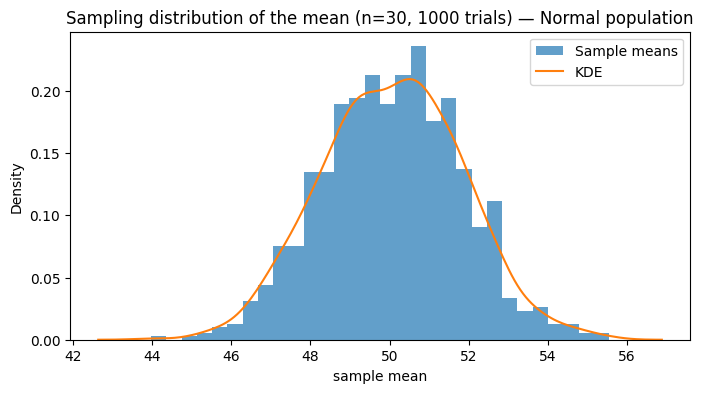

In [10]:
# Create populations
N_pop = 200000

pop_normal = np.random.normal(loc=50, scale=10, size=N_pop)       # Normal
pop_skewed = np.random.exponential(scale=10, size=N_pop) + 30      # Right skewed
pop_binary = np.random.binomial(n=1, p=0.12, size=N_pop)          # Binary event (e.g., conversion)

# Quick summaries
for name, pop in [('Normal', pop_normal), ('Skewed', pop_skewed), ('Binary', pop_binary)]:
    print(f"{name}: mean={np.mean(pop):.3f}, std={np.std(pop, ddof=1):.3f}")

# Sampling distribution of the mean for Normal population
n = 30  # sample size
n_trials = 1000
sample_means = [np.mean(np.random.choice(pop_normal, size=n, replace=False)) for _ in range(n_trials)]

plt.figure(figsize=(8,4))
plt.hist(sample_means, bins=30, density=True, alpha=0.7, label='Sample means')
sns.kdeplot(sample_means, label='KDE')
plt.title(f'Sampling distribution of the mean (n={n}, {n_trials} trials) — Normal population')
plt.xlabel('sample mean')
plt.legend()
plt.show()

### 2 — Central Limit Theorem (CLT) visualization

The CLT says that as sample size increases, the sampling distribution of the mean approaches a normal distribution, even if the population is not normal. Let's demonstrate with our skewed population.

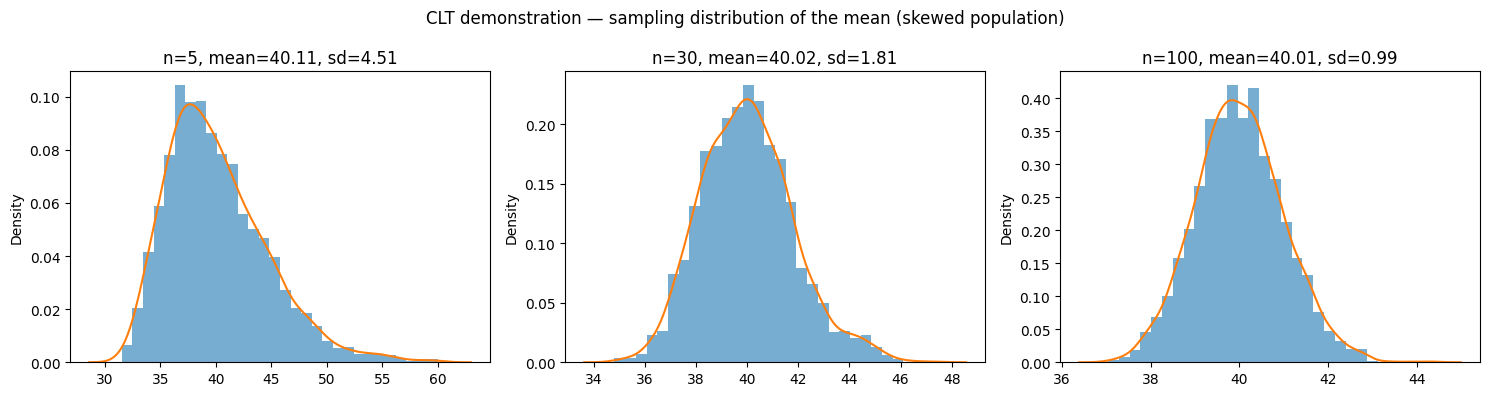

In [11]:
def show_clt(pop, sample_sizes=[5, 30, 100], trials=2000):
    fig, axes = plt.subplots(1, len(sample_sizes), figsize=(5*len(sample_sizes),4))
    for ax, n in zip(axes, sample_sizes):
        means = [np.mean(np.random.choice(pop, n, replace=False)) for _ in range(trials)]
        ax.hist(means, bins=30, density=True, alpha=0.6)
        sns.kdeplot(means, ax=ax)
        ax.set_title(f'n={n}, mean={np.mean(means):.2f}, sd={np.std(means, ddof=1):.2f}')
    plt.suptitle('CLT demonstration — sampling distribution of the mean (skewed population)')
    plt.tight_layout()
    plt.show()

show_clt(pop_skewed)

### 3 — One-sample z-test (known sigma)

When the population standard deviation (sigma) is known and sample size is large, use the z-test.

**Formula:**
$$z = \frac{\bar{x} - \mu_0}{\sigma/\sqrt{n}}$$

In practice, sigma is rarely known. This is mainly conceptual or used with very large samples.

In [12]:
def z_test_one_sample(x, mu0, sigma):
    n = len(x)
    xbar = np.mean(x)
    z = (xbar - mu0) / (sigma / sqrt(n))
    # two-tailed p-value
    p_two = 2 * (1 - stats.norm.cdf(abs(z)))
    return z, p_two

# Example: sample from normal population where true mu = 50
sample = np.random.choice(pop_normal, size=50, replace=False)
known_sigma = 10.0
z_stat, p_two = z_test_one_sample(sample, mu0=50, sigma=known_sigma)
print(f'Sample mean: {np.mean(sample):.3f}')
print(f'z-stat: {z_stat:.4f}, p-value (two-tailed): {p_two:.4f}')

# One-tailed p-value (H_a: mean > mu0)
p_one_greater = 1 - stats.norm.cdf(z_stat)
print(f'p-value (one-tailed, >): {p_one_greater:.4f}')

Sample mean: 51.156
z-stat: 0.8175, p-value (two-tailed): 0.4136
p-value (one-tailed, >): 0.2068


### 4 — One-sample t-test (unknown sigma)

When sigma is unknown and sample size is small, use the t-distribution.

**Formula:**
$$t = \frac{\bar{x} - \mu_0}{s/\sqrt{n}}$$

where s is the sample standard deviation. The t-distribution has "fatter tails" than the normal, giving us more conservative p-values for small samples.

In [13]:
def t_test_one_sample(x, mu0):
    n = len(x)
    xbar = np.mean(x)
    s = np.std(x, ddof=1)
    t_stat = (xbar - mu0) / (s / np.sqrt(n))
    p_two = 2 * (1 - t.cdf(abs(t_stat), df=n-1))
    return t_stat, p_two

# Small sample example
small_sample = np.random.choice(pop_normal, size=12, replace=False)
t_stat, p_two = t_test_one_sample(small_sample, mu0=50)
print(f'Sample size: {len(small_sample)}')
print(f'Sample mean: {np.mean(small_sample):.3f}, sample std: {np.std(small_sample, ddof=1):.3f}')
print(f't-stat (manual): {t_stat:.4f}, p-value: {p_two:.4f}')

# SciPy's ttest_1samp
scipy_t = stats.ttest_1samp(small_sample, popmean=50)
print(f'SciPy ttest_1samp: statistic={scipy_t.statistic:.4f}, pvalue={scipy_t.pvalue:.4f}')

Sample size: 12
Sample mean: 53.716, sample std: 7.945
t-stat (manual): 1.6202, p-value: 0.1335
SciPy ttest_1samp: statistic=1.6202, pvalue=0.1335


### 5 — Two-sample t-test (independent groups)

Compare two independent groups. Two variants:
- **Student's t-test:** assumes equal variances (simpler)
- **Welch's t-test:** allows unequal variances (more robust, preferred)

In [14]:
# Two-sample example: compare two model accuracy samples
acc_A = np.random.normal(loc=0.78, scale=0.03, size=30)  # model A
acc_B = np.random.normal(loc=0.75, scale=0.03, size=30)  # model B

# Welch's t-test (default, unequal variance)
welch = stats.ttest_ind(acc_A, acc_B, equal_var=False)
print(f"Welch's t-test: t={welch.statistic:.4f}, p={welch.pvalue:.4f}")

# Student's t-test (equal variance)
student = stats.ttest_ind(acc_A, acc_B, equal_var=True)
print(f"Student's t-test: t={student.statistic:.4f}, p={student.pvalue:.4f}")

# Manual pooled t-statistic (for learning)
def pooled_ttest(x, y):
    nx, ny = len(x), len(y)
    sx2 = np.var(x, ddof=1)
    sy2 = np.var(y, ddof=1)
    sp2 = ((nx-1)*sx2 + (ny-1)*sy2) / (nx+ny-2)
    se = np.sqrt(sp2 * (1/nx + 1/ny))
    t_stat = (np.mean(x) - np.mean(y)) / se
    df = nx + ny - 2
    p_two = 2 * (1 - t.cdf(abs(t_stat), df))
    return t_stat, p_two, df

pt, pp, df = pooled_ttest(acc_A, acc_B)
print(f"Pooled t-test (manual): t={pt:.4f}, p={pp:.4f}, df={df}")

Welch's t-test: t=4.9767, p=0.0000
Student's t-test: t=4.9767, p=0.0000
Pooled t-test (manual): t=4.9767, p=0.0000, df=58


### 6 — Paired t-test

Use paired t-test when observations are naturally paired (e.g., pre/post measurements, or same test set predicted by two classifiers). This accounts for within-subject correlation and often increases power.

In [15]:
# Paired example: pre/post
pre = np.random.normal(loc=1.0, scale=0.4, size=25)
post = pre + np.random.normal(loc=-0.15, scale=0.2, size=25)  # slight decrease

paired = stats.ttest_rel(pre, post)
print(f'Paired t-test: t={paired.statistic:.4f}, p={paired.pvalue:.4f}')

# Manual paired approach (differences)
diffs = pre - post
t_stat, p_two = t_test_one_sample(diffs, mu0=0)
print(f'Paired (manual via differences): t={t_stat:.4f}, p={p_two:.4f}')

Paired t-test: t=3.6152, p=0.0014
Paired (manual via differences): t=3.6152, p=0.0014


### 7 — One-tailed vs two-tailed tests

#### Understanding the difference

**Two-tailed test:**
- **Hypothesis:** H1: μ ≠ μ0 (or p_A ≠ p_B, etc.)
- **Interpretation:** Tests whether there is *any* difference (in either direction)
- **p-value:** Probability of observing as extreme a result in *either* direction
- **Rejection region:** Split between both tails (e.g., α/2 = 0.025 in each tail for α = 0.05)
- **When to use:** When you have no prior expectation of direction, or when both directions matter

**One-tailed test (e.g., right-tail):**
- **Hypothesis:** H1: μ > μ0 (or p_A < p_B for left-tail)
- **Interpretation:** Tests whether the parameter is *specifically greater* (or less)
- **p-value:** Probability of observing as extreme a result in the *specified direction only*
- **Rejection region:** All α in one tail (e.g., α = 0.05 in right tail)
- **When to use:** When you have a *prior scientific/business expectation* of direction (e.g., "new treatment should improve outcomes")

#### Critical rule: Decide before looking at data!

Choosing the tail *after* seeing the data inflates Type I error. This is called **p-hacking** or **multiple comparisons** and is scientifically invalid.

#### Mathematical relationship

For a test statistic t:
$$p_{\text{two-tailed}} = 2 \times P(T > |t|)$$
$$p_{\text{one-tailed}} = P(T > t) \text{ (for right-tail, } H_1: \mu > \mu_0\text{)}$$

So **one-tailed p-values are roughly half of two-tailed** (when statistic is in the hypothesized direction).

#### Business/ML examples

- **Two-tailed:** Does model A differ from model B? (Don't know which is better yet)
- **One-tailed right:** Does feature X improve accuracy? (Directional: we expect improvement)
- **One-tailed left:** Does the new manufacturing process reduce defects? (Directional: we expect reduction)


In [16]:
# Example: one-tailed from two-tailed
res = stats.ttest_ind(acc_A, acc_B, equal_var=False)
print(f'Two-tailed p: {res.pvalue:.4f}')

# Convert to one-tailed p (H_a: mean(A) > mean(B))
if res.statistic > 0:
    p_one_greater = res.pvalue / 2
else:
    p_one_greater = 1 - res.pvalue / 2
    
print(f'One-tailed p (A > B): {p_one_greater:.4f}')

Two-tailed p: 0.0000
One-tailed p (A > B): 0.0000


### 8 — Confidence intervals & relation to hypothesis tests

If a 95% CI for a parameter does not include the null value (e.g., 0 for a difference), you would reject H0 at alpha=0.05.

Mean diff (A - B): 0.0466
95% CI: (0.0278, 0.0653), df~57.9
CI includes 0: False


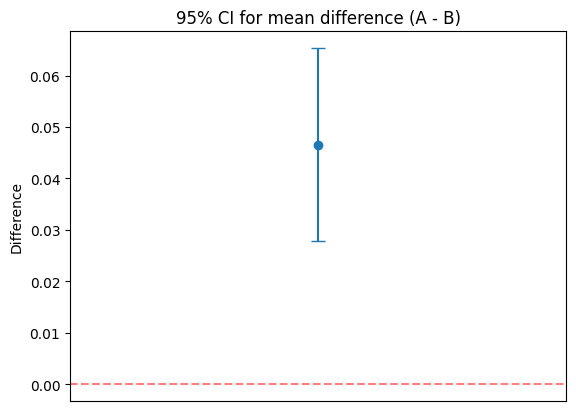

In [17]:
# 95% CI for difference in two independent means (Welch)
mean_diff = np.mean(acc_A) - np.mean(acc_B)
se_diff = np.sqrt(np.var(acc_A, ddof=1)/len(acc_A) + np.var(acc_B, ddof=1)/len(acc_B))

# Use Welch-Satterthwaite df approximation
s1, s2 = np.var(acc_A, ddof=1), np.var(acc_B, ddof=1)
nx, ny = len(acc_A), len(acc_B)
df = (s1/nx + s2/ny)**2 / ((s1**2)/((nx**2)*(nx-1)) + (s2**2)/((ny**2)*(ny-1)))
ci_low = mean_diff - stats.t.ppf(0.975, df) * se_diff
ci_high = mean_diff + stats.t.ppf(0.975, df) * se_diff

print(f'Mean diff (A - B): {mean_diff:.4f}')
print(f'95% CI: ({ci_low:.4f}, {ci_high:.4f}), df~{df:.1f}')
print(f'CI includes 0: {ci_low <= 0 <= ci_high}')

# Plot
plt.errorbar([0], [mean_diff], yerr=[[mean_diff-ci_low],[ci_high-mean_diff]], fmt='o', capsize=5)
plt.axhline(0, color='red', linestyle='--', alpha=0.5)
plt.title('95% CI for mean difference (A - B)')
plt.xlim(-1,1)
plt.xticks([])
plt.ylabel('Difference')
plt.show()

### 9 — Effect size (Cohen's d)

Statistical significance ≠ practical significance. Always report effect sizes:

$$d = \frac{\bar{x}_1 - \bar{x}_2}{s_p}$$

Rules of thumb: 0.2 (small), 0.5 (medium), 0.8 (large).

In [18]:
def cohen_d(x, y):
    nx, ny = len(x), len(y)
    sx2 = np.var(x, ddof=1)
    sy2 = np.var(y, ddof=1)
    sp = np.sqrt(((nx-1)*sx2 + (ny-1)*sy2) / (nx+ny-2))
    return (np.mean(x) - np.mean(y)) / sp

d = cohen_d(acc_A, acc_B)
interpretation = 'small' if abs(d)<0.5 else ('medium' if abs(d)<0.8 else 'large')
print(f"Cohen's d: {d:.4f} ({interpretation})")

Cohen's d: 1.2850 (large)


### 10 — Power analysis & sample size

Determine sample size needed to detect an effect of size d with power 0.8 and alpha 0.05.

Required n per group: 176


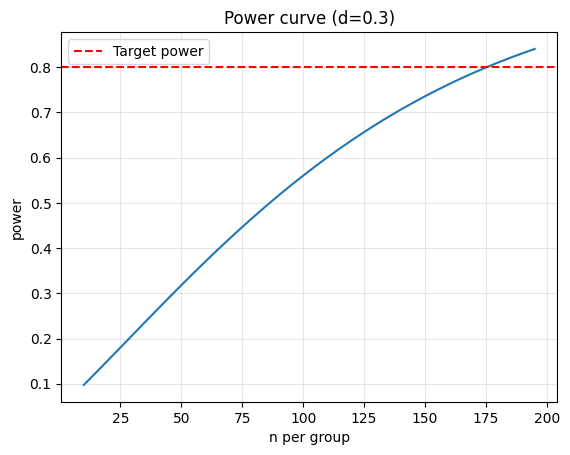

In [19]:
from statsmodels.stats.power import TTestIndPower

analysis = TTestIndPower()
eff_size = 0.3
alpha = 0.05
power = 0.8
n_required = analysis.solve_power(effect_size=eff_size, alpha=alpha, power=power, alternative='two-sided')
print(f'Required n per group: {np.ceil(n_required):.0f}')

# Power curve
sample_range = np.arange(10, 200, 5)
power_vals = [analysis.power(effect_size=eff_size, nobs1=n, alpha=alpha, ratio=1.0, alternative='two-sided') for n in sample_range]
plt.plot(sample_range, power_vals)
plt.axhline(0.8, color='red', linestyle='--', label='Target power')
plt.xlabel('n per group')
plt.ylabel('power')
plt.title(f'Power curve (d={eff_size})')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### 11 — Parametric vs Non-Parametric Tests

#### What are parametric tests?

Parametric tests assume the data follows a specific distribution (usually **normal/Gaussian**). They estimate the parameters (mean, variance) of that distribution.

**Examples:**
- t-tests (one-sample, two-sample, paired)
- z-tests
- ANOVA
- Pearson correlation
- Linear regression

**Advantages:**
- ✅ Higher **power** (more likely to detect true effects) when assumptions are satisfied
- ✅ Simpler formulas and faster computation
- ✅ Well-developed theory and software support

**Disadvantages:**
- ❌ **Sensitive to violations** of assumptions (non-normality, outliers, unequal variances)
- ❌ May give misleading p-values if assumptions fail
- ❌ Not suitable for small samples or ordinal/ranked data

#### What are non-parametric tests?

Non-parametric tests make **fewer assumptions** about the underlying distribution. They typically work with ranks rather than raw values.

**Examples:**
- Mann–Whitney U (instead of t-test for independent samples)
- Wilcoxon signed-rank (instead of paired t-test)
- Kruskal–Wallis (instead of one-way ANOVA)
- Spearman correlation (instead of Pearson)

**Advantages:**
- ✅ **Robust** to outliers and distribution violations
- ✅ Work with ordinal data (ranks, ratings, scores)
- ✅ Valid for small samples
- ✅ Distribution-free (no assumption about the shape)

**Disadvantages:**
- ❌ **Lower power** than parametric tests when data is actually normal
- ❌ Less flexible; some advanced techniques unavailable
- ❌ Harder to interpret (working with ranks, not means)

#### Practical decision tree

1. **Check assumptions (normality, equal variances):**
   - Use Shapiro–Wilk test (H0: data is normal)
   - Use Levene's test (H0: equal variances)

2. **If assumptions are met AND sample size is reasonable:**
   - → Use **parametric** test (higher power)

3. **If assumptions violated OR small sample OR ordinal data:**
   - → Use **non-parametric** test (more robust)

4. **When in doubt:**
   - → Report **both** and see if conclusions agree
   - → Use **permutation/bootstrap** (modern, flexible)

#### Visual comparison: Normal vs Skewed data

When data is normal, t-test and Mann–Whitney give similar results. When data is skewed or has outliers, Mann–Whitney is more reliable.


In [20]:
# Test assumptions before choosing parametric vs non-parametric

# Normality test (Shapiro-Wilk)
shapiro_a = stats.shapiro(acc_A)
shapiro_b = stats.shapiro(acc_B)
print('Normality tests (Shapiro-Wilk):')
print(f'  acc_A: W={shapiro_a.statistic:.4f}, p={shapiro_a.pvalue:.4f} => Normal: {shapiro_a.pvalue > 0.05}')
print(f'  acc_B: W={shapiro_b.statistic:.4f}, p={shapiro_b.pvalue:.4f} => Normal: {shapiro_b.pvalue > 0.05}')

# Equal variance test (Levene's)
levene = stats.levene(acc_A, acc_B)
print(f'\nLevene test (equal variances): F={levene.statistic:.4f}, p={levene.pvalue:.4f} => Equal vars: {levene.pvalue > 0.05}')

# Compare parametric vs non-parametric
print('\n--- Comparison of parametric vs non-parametric ---')

# Parametric: Welch's t-test
welch = stats.ttest_ind(acc_A, acc_B, equal_var=False)
print(f"Welch's t-test (parametric): t={welch.statistic:.4f}, p={welch.pvalue:.4f}")

# Non-parametric: Mann-Whitney U test
mw = stats.mannwhitneyu(acc_A, acc_B, alternative='two-sided')
print(f'Mann-Whitney U (non-parametric): U={mw.statistic:.4f}, p={mw.pvalue:.4f}')

print('\nNote: Both tests give similar conclusions when data is normal.')
print('If data were skewed, Mann-Whitney would be more reliable.')

# Wilcoxon signed-rank (paired)
print('\n--- Paired samples (pre/post) ---')
w = stats.wilcoxon(pre, post)
print(f'Wilcoxon signed-rank: statistic={w.statistic:.4f}, p={w.pvalue:.4f}')

# Compare with paired t-test
paired = stats.ttest_rel(pre, post)
print(f'Paired t-test: t={paired.statistic:.4f}, p={paired.pvalue:.4f}')


Normality tests (Shapiro-Wilk):
  acc_A: W=0.9456, p=0.1285 => Normal: True
  acc_B: W=0.9497, p=0.1658 => Normal: True

Levene test (equal variances): F=0.3003, p=0.5858 => Equal vars: True

--- Comparison of parametric vs non-parametric ---
Welch's t-test (parametric): t=4.9767, p=0.0000
Mann-Whitney U (non-parametric): U=740.0000, p=0.0000

Note: Both tests give similar conclusions when data is normal.
If data were skewed, Mann-Whitney would be more reliable.

--- Paired samples (pre/post) ---
Wilcoxon signed-rank: statistic=53.0000, p=0.0023
Paired t-test: t=3.6152, p=0.0014


### 12 — Permutation test & bootstrap

Build the null distribution by shuffling labels (permutation) or resampling with replacement (bootstrap).

In [21]:
def permutation_test(x, y, n_permutations=5000, seed=RNG_SEED):
    rng = np.random.RandomState(seed)
    observed = np.mean(x) - np.mean(y)
    pooled = np.concatenate([x, y])
    stats_perm = []
    for _ in range(n_permutations):
        rng.shuffle(pooled)
        new_x = pooled[:len(x)]
        new_y = pooled[len(x):]
        stats_perm.append(np.mean(new_x) - np.mean(new_y))
    stats_perm = np.array(stats_perm)
    p_two = np.mean(np.abs(stats_perm) >= abs(observed))
    return observed, p_two, stats_perm

obs, pperm, null_dist = permutation_test(acc_A, acc_B)
print(f'Permutation test: observed diff={obs:.4f}, p={pperm:.4f}')

# Bootstrap CI
def bootstrap_ci(x, y, n_boot=2000, alpha=0.05, seed=RNG_SEED):
    rng = np.random.RandomState(seed)
    boot_diffs = []
    for _ in range(n_boot):
        bx = rng.choice(x, size=len(x), replace=True)
        by = rng.choice(y, size=len(y), replace=True)
        boot_diffs.append(np.mean(bx) - np.mean(by))
    ci_low = np.percentile(boot_diffs, 100*alpha/2)
    ci_high = np.percentile(boot_diffs, 100*(1-alpha/2))
    return np.mean(boot_diffs), ci_low, ci_high, boot_diffs

mean_boot, low_boot, high_boot, _ = bootstrap_ci(acc_A, acc_B)
print(f'Bootstrap CI: ({low_boot:.4f}, {high_boot:.4f})')

Permutation test: observed diff=0.0466, p=0.0000
Bootstrap CI: (0.0286, 0.0634)


### 13 — Multiple testing corrections

When you run many tests, some will be significant by chance. Use corrections:
- **Bonferroni:** controls family-wise error rate (FWER).
- **Benjamini–Hochberg:** controls false discovery rate (FDR).

In [22]:
# Simulate multiple tests
rng = np.random.RandomState(RNG_SEED)
num_tests = 50
pvals = []
for i in range(num_tests):
    if i < 5:  # first 5 have real effect
        a = rng.normal(0.5, 0.2, size=30)
        b = rng.normal(0.0, 0.2, size=30)
    else:
        a = rng.normal(0.0, 0.2, size=30)
        b = rng.normal(0.0, 0.2, size=30)
    p = stats.ttest_ind(a, b, equal_var=False).pvalue
    pvals.append(p)

pvals = np.array(pvals)
_, p_bonf, _, _ = smm.multipletests(pvals, alpha=0.05, method='bonferroni')
_, p_bh, _, _ = smm.multipletests(pvals, alpha=0.05, method='fdr_bh')

print(f'Raw significant: {np.sum(pvals < 0.05)} / {num_tests}')
print(f'Bonferroni: {np.sum(p_bonf < 0.05)} / {num_tests}')
print(f'BH: {np.sum(p_bh < 0.05)} / {num_tests}')

Raw significant: 9 / 50
Bonferroni: 5 / 50
BH: 5 / 50


### 14 — ML applications: A/B tests & model comparison

Practical examples: proportion z-test (conversion rates), McNemar (classifier disagreement).

In [23]:
# Proportion z-test (A/B conversions)
conv_A, n_A = 120, 1500
conv_B, n_B = 95, 1500

p_pool = (conv_A + conv_B) / (n_A + n_B)
z = (conv_A/n_A - conv_B/n_B) / np.sqrt(p_pool*(1-p_pool)*(1/n_A+1/n_B))
p_two = 2*(1 - stats.norm.cdf(abs(z)))

print(f'Proportion z-test: z={z:.4f}, p={p_two:.4f}')

# McNemar (classifier disagreement)
b, c = 30, 10  # b=A correct, B wrong; c=A wrong, B correct
chi2 = (abs(b - c) - 1)**2 / (b + c)
p_mcnemar = 1 - stats.chi2.cdf(chi2, df=1)

print(f'McNemar: chi2={chi2:.4f}, p={p_mcnemar:.4f}')

Proportion z-test: z=1.7696, p=0.0768
McNemar: chi2=9.0250, p=0.0027


### 15 — Addressing Multicollinearity: Variance Inflation Factor (VIF)

#### What is multicollinearity?

**Multicollinearity** occurs when two or more predictor variables in a regression model are **highly correlated** with each other. This causes problems:

**Problems caused by multicollinearity:**
- ❌ **Large standard errors** in regression coefficients → wider confidence intervals → weaker hypothesis tests
- ❌ **Unstable estimates**: small changes in data → big changes in coefficients
- ❌ **Difficult interpretation**: hard to isolate the effect of individual variables
- ❌ **Poor predictions**: model may overfit to training data despite good fit
- ❌ **Misleading p-values**: variables may appear non-significant when they actually are (due to inflated SE)

**Example scenario:**
- Predicting house price from square footage and number of rooms
- These two variables are highly correlated (larger house → more rooms)
- The effect of each variable becomes unclear

#### What is Variance Inflation Factor (VIF)?

**VIF** quantifies how much the variance of a regression coefficient is inflated due to multicollinearity.

$$\text{VIF}_j = \frac{1}{1 - R_j^2}$$

where $R_j^2$ is the R² from regressing variable $j$ against all other predictors.

**Interpretation:**
- **VIF = 1**: No correlation with other predictors (ideal)
- **1 < VIF < 5**: Moderate correlation (usually acceptable)
- **VIF > 5**: High multicollinearity (problematic) ← **threshold often used**
- **VIF > 10**: Severe multicollinearity (must address)

**Why is VIF useful?**
- Simple to compute and interpret
- Each variable gets its own VIF score
- Directly shows impact on standard errors: $\text{SE}_{\text{with multicollinearity}} = \text{SE}_{\text{no multicollinearity}} \times \sqrt{\text{VIF}}$

#### How to detect multicollinearity

1. **Correlation matrix:** Look for correlations > 0.7 or < -0.7
2. **Correlation heatmap:** Visualize pairwise correlations
3. **VIF test:** Compute VIF for each predictor

#### How to address multicollinearity

**Option 1: Remove or combine variables**
- Drop one of the correlated variables
- Combine correlated variables into a single index (e.g., PCA)

**Option 2: Regularization**
- Use **Ridge regression** (L2 penalty) or **Lasso** (L1 penalty)
- These shrink coefficients, reducing the effect of multicollinearity

**Option 3: Collect more data**
- Larger sample size can reduce standard errors

**Option 4: Reframe the problem**
- Use **relative differences** instead of absolute values
- Center or standardize predictors


=== Correlation Matrix ===
          x1        x2        x3         y
x1  1.000000  0.995251 -0.151031  0.972934
x2  0.995251  1.000000 -0.160902  0.973579
x3 -0.151031 -0.160902  1.000000  0.047548
y   0.972934  0.973579  0.047548  1.000000


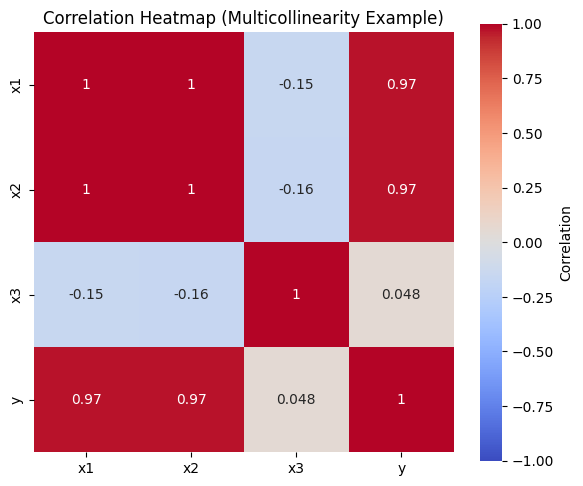


➤ Note: x1 and x2 are highly correlated (r = 0.995)

=== Variance Inflation Factor (VIF) ===
  Variable         VIF
0       x1  104.069386
1       x2  104.392490
2       x3    1.035209

Interpretation:
  x1: VIF = 104.07 — ✗ Severe multicollinearity
  x2: VIF = 104.39 — ✗ Severe multicollinearity
  x3: VIF = 1.04 — ✓ Acceptable

=== Regression with Multicollinearity ===
  x1: coefficient = 1.0710
  x2: coefficient = 3.9636
  x3: coefficient = 0.9650

=== Regression without x2 (removing correlated variable) ===
  x1: coefficient = 4.8736
  x3: coefficient = 0.9253

➤ Note: Removing the correlated variable x2 stabilizes the coefficient for x1

=== Ridge Regression (L2 Regularization) ===
  x1: coefficient = 2.0609
  x2: coefficient = 2.9089
  x3: coefficient = 0.9428

➤ Note: Ridge regression handles multicollinearity by shrinking coefficients


In [24]:
# Multicollinearity detection example

# Create a dataset with multicollinearity
np.random.seed(RNG_SEED)
n = 100
x1 = np.random.normal(0, 1, n)
x2 = 0.95 * x1 + 0.1 * np.random.normal(0, 1, n)  # highly correlated with x1
x3 = np.random.normal(0, 1, n)  # independent

y = 2*x1 + 3*x2 + 1*x3 + np.random.normal(0, 0.5, n)

# Create DataFrame
df_multi = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'y': y})

# Step 1: Correlation matrix
print('=== Correlation Matrix ===')
corr_matrix = df_multi.corr()
print(corr_matrix)

# Step 2: Visualize correlations (heatmap)
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, square=True, 
            vmin=-1, vmax=1, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Heatmap (Multicollinearity Example)')
plt.tight_layout()
plt.show()

print(f'\n➤ Note: x1 and x2 are highly correlated (r = {corr_matrix.loc["x1", "x2"]:.3f})')

# Step 3: Compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_multi[['x1', 'x2', 'x3']]
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print('\n=== Variance Inflation Factor (VIF) ===')
print(vif_data)

# Interpretation
print('\nInterpretation:')
for idx, row in vif_data.iterrows():
    var = row['Variable']
    vif = row['VIF']
    if vif < 5:
        status = '✓ Acceptable'
    elif vif < 10:
        status = '⚠ Moderate multicollinearity'
    else:
        status = '✗ Severe multicollinearity'
    print(f"  {var}: VIF = {vif:.2f} — {status}")

# Step 4: Fit regression with multicollinearity
from sklearn.linear_model import LinearRegression

X_with_multi = df_multi[['x1', 'x2', 'x3']]
y_target = df_multi['y']

model_multi = LinearRegression()
model_multi.fit(X_with_multi, y_target)

print('\n=== Regression with Multicollinearity ===')
for i, coef in enumerate(model_multi.coef_):
    var_name = X_with_multi.columns[i]
    print(f"  {var_name}: coefficient = {coef:.4f}")

# Step 5: Compare with removing correlated variable
print('\n=== Regression without x2 (removing correlated variable) ===')
X_no_multi = df_multi[['x1', 'x3']]
model_no_multi = LinearRegression()
model_no_multi.fit(X_no_multi, y_target)

for i, coef in enumerate(model_no_multi.coef_):
    var_name = X_no_multi.columns[i]
    print(f"  {var_name}: coefficient = {coef:.4f}")

print('\n➤ Note: Removing the correlated variable x2 stabilizes the coefficient for x1')

# Step 6: Use regularization (Ridge regression)
from sklearn.linear_model import Ridge

print('\n=== Ridge Regression (L2 Regularization) ===')
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_with_multi, y_target)

for i, coef in enumerate(ridge_model.coef_):
    var_name = X_with_multi.columns[i]
    print(f"  {var_name}: coefficient = {coef:.4f}")

print('\n➤ Note: Ridge regression handles multicollinearity by shrinking coefficients')


## Takeaways

### Hypothesis Testing Core Concepts
- **Hypothesis testing** is a formal method to assess whether observed differences are "real" or due to random chance.
- **One-tailed vs two-tailed:** choose directional vs non-directional *before* seeing data to avoid p-hacking.
- **Statistical ≠ practical significance:** always report effect sizes and confidence intervals alongside p-values.

### Test Selection
- **Parametric tests** (t-test, z-test): Higher power when normality holds; sensitive to violations
- **Non-parametric tests** (Mann–Whitney, Wilcoxon): More robust to outliers/non-normality; suitable for ordinal data
- **Decision rule:** Check assumptions (Shapiro-Wilk, Levene's) → choose appropriately or use permutation/bootstrap

### Model Validity & Diagnostics
- **Multicollinearity** inflates standard errors and destabilizes coefficients in regression models
- **VIF > 5**: Indicates problematic multicollinearity; remedies include removing variables, regularization (Ridge/Lasso), or collecting more data
- **Assumptions matter:** check normality, independence, equal variances; use non-parametric/permutation/bootstrap alternatives when assumptions fail

### Best Practices in ML & Business
- Use hypothesis testing for **A/B tests**, **model comparisons**, **feature validation**, and **quantifying uncertainty**
- Always report effect sizes (Cohen's d), confidence intervals, and sample sizes alongside p-values
- When running multiple tests, apply corrections (Bonferroni, Benjamini–Hochberg) to control error rates
- Consider practical significance, not just statistical significance
- Document and justify all decisions made before analyzing data

**Further reading:** 
- Introductory Statistics textbook (e.g., *An Introduction to Statistical Learning*)
- [SciPy documentation](https://scipy.org/)
- [Statsmodels](https://www.statsmodels.org/)
- A/B testing and experimental design tutorials
- James et al., "An Introduction to Statistical Learning" — Chapter on Regression
